# Titanic: Machine Learning from Disaster
Predicting survival on the Titanic with ML.

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Analysis

In [2]:
# read the data from the train and test csv files
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')
test_op_df = pd.read_csv('./dataset/testResults.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('Training dataset shape: ', train_df.shape)
print('Testing dataset shape: ', test_df.shape)

Training dataset shape:  (891, 12)
Testing dataset shape:  (418, 11)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# describe gives statistical information about all columns in the dataset
train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Karaic, Mr. Milan",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# check if any of the columns has null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# check if any of the columns has null values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data corrections/improvements

In [10]:
# drop the columns which are not needed
train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [11]:
# Replace the colums 'SibSp' & 'Parch' with a single column 'Family' which represents whether the passenger had any family
# member aboard or not
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

# drop tht 'SibSp' and 'Parch' columns
train_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [12]:
z = lambda x: x.strip().split(',')[1].split('.')[0]
train_df['Title'] = train_df['Name'].apply(z)
test_df['Title'] = test_df['Name'].apply(z)

# drop tht 'Name' column
train_df.drop('Name', axis = 1, inplace = True)
test_df.drop('Name', axis = 1, inplace = True)

In [13]:
# fill the null values of 'Age' column with the mean of the column values
train_df.Age.fillna(train_df['Age'].mean(), inplace = True)
test_df.Age.fillna(test_df['Age'].mean(), inplace = True)
train_df.Age.fillna('S', inplace = True)

In [14]:
# fill the null values of 'Fare' column with the mean of the column values
test_df.Fare.fillna(test_df['Fare'].mean(), inplace = True)

In [15]:
# convert the values of 'Embarked' column to numerical format
z = lambda x: 1 if x == 'C' else (2 if x == 'Q' else 3)
train_df['Embarked'] = train_df['Embarked'].apply(z)
test_df['Embarked'] = test_df['Embarked'].apply(z)

In [16]:
# convert the values of 'Sex' column to numerical format
z = lambda x: 1 if x == 'male' else 0
train_df['Sex'] = train_df['Sex'].apply(z)
test_df['Sex'] = test_df['Sex'].apply(z)

## Data Visualization

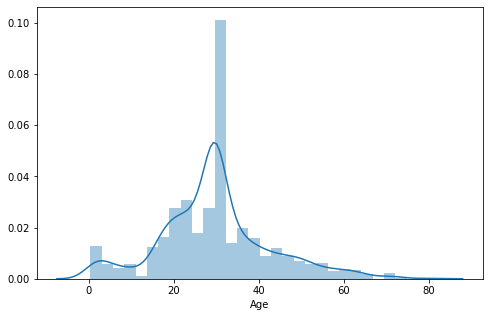

In [17]:
plt.figure(figsize = [8,5])
sns.distplot(train_df['Age']);

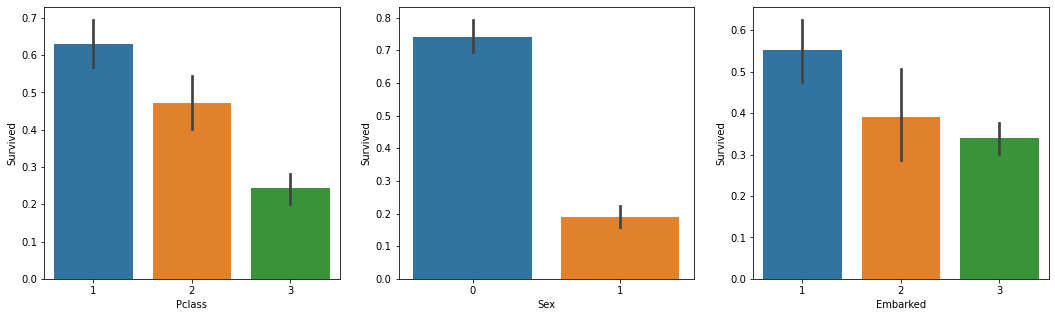

In [18]:
# (Pclass, Sex, Embarked) Vs Survived
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize = (18,5))
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df, ax = axis1)
sns.barplot(x = 'Sex', y = 'Survived', data = train_df, ax = axis2)
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df, ax = axis3);

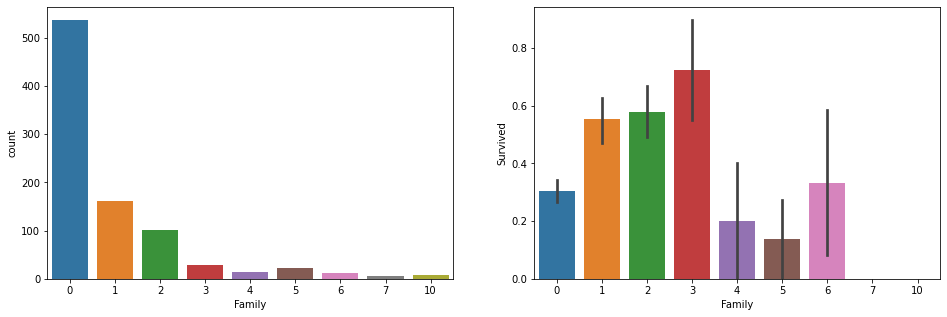

In [19]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (16, 5))
sns.countplot(x = 'Family', data = train_df, ax = axis1)
sns.barplot(x = 'Family', y = 'Survived', data = train_df, ax = axis2);

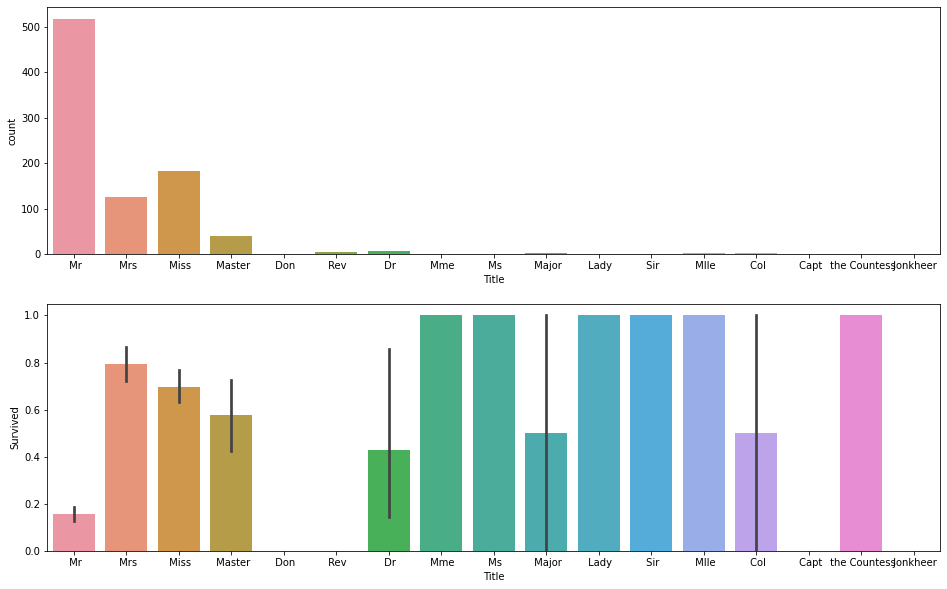

In [20]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize = (16, 10))
sns.countplot(x = 'Title', data = train_df, ax = axis1)
sns.barplot(x = 'Title', y = 'Survived', data = train_df, ax = axis2);

### Convert 'Title' column into int valued coulmns

In [21]:
y = train_df.Title.value_counts() > 10
z = test_df.Title.value_counts() > 10
train_df['Title'] = train_df['Title'].apply(lambda x: 'Others' if y[x] == False else x)
test_df['Title'] = test_df['Title'].apply(lambda x: 'Others' if z[x] == False else x)

train_df = pd.concat([train_df, pd.get_dummies(train_df['Title'])], axis = 1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Title'])], axis = 1)

# drop the 'Name' column
train_df.drop('Title', axis = 1, inplace = True)
test_df.drop('Title', axis = 1, inplace = True)

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Master,Miss,Mr,Mrs,Others
0,0,3,1,22.0,7.2500,3,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,1,1,0,0,0,1,0
2,1,3,0,26.0,7.9250,3,0,0,1,0,0,0
3,1,1,0,35.0,53.1000,3,1,0,0,0,1,0
4,0,3,1,35.0,8.0500,3,0,0,0,1,0,0


## Machine Learning

In [23]:
# import the required modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# get the training and test data from the dataframes
(Y_train, X_train) = (train_df['Survived'].values, train_df.drop(['Survived'], axis = 1).values)
Y_train = Y_train.reshape(X_train.shape[0], 1)
X_test = test_df.values
Y_test = test_op_df['Survived'].values

print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))

X_train shape:(891, 11)
Y_train shape:(891, 1)
X_test shape:(418, 11)


### Scale the values using StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 1. Using Logistic Regression

In [26]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, Y_train)

# train score
lr_train_score = round(logreg.score(X_train, Y_train) * 100, 2)
lr_test_score = round(logreg.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_lr = logreg.predict(X_test)

print('Logistic Regression train score: ', lr_train_score)
print('Logistic Regression test score: ', lr_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_lr))

Logistic Regression train score:  82.94
Logistic Regression test score:  77.99
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       260
           1       0.71      0.70      0.71       158

    accuracy                           0.78       418
   macro avg       0.77      0.76      0.77       418
weighted avg       0.78      0.78      0.78       418

Confusion Matrix:
 [[215  45]
 [ 47 111]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 2. Using Random Forest Classifier

In [27]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train, Y_train)

# train score
rf_train_score = round(rf_cl.score(X_train, Y_train) * 100, 2)
rf_test_score = round(rf_cl.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_rf = rf_cl.predict(X_test)

print('Random Forest train score: ', rf_train_score)
print('Random Forest test score: ', rf_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_rf))

<ipython-input-27-441f4d1e585f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(X_train, Y_train)


Random Forest train score:  98.32
Random Forest test score:  76.08
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       260
           1       0.70      0.65      0.67       158

    accuracy                           0.76       418
   macro avg       0.75      0.74      0.74       418
weighted avg       0.76      0.76      0.76       418

Confusion Matrix:
 [[216  44]
 [ 56 102]]


### 3. Using Support Vector Machines

In [28]:
svm_cl = svm.SVC(kernel = 'linear')
svm_cl.fit(X_train, Y_train)

# train score
svm_train_score = round(svm_cl.score(X_train, Y_train) * 100, 2)
svm_test_score = round(svm_cl.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_svm = svm_cl.predict(X_test)

print('SVM train score: ', svm_train_score)
print('SVM test score: ', svm_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_svm))

SVM train score:  83.16
SVM test score:  77.75
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       260
           1       0.70      0.72      0.71       158

    accuracy                           0.78       418
   macro avg       0.76      0.77      0.76       418
weighted avg       0.78      0.78      0.78       418

Confusion Matrix:
 [[211  49]
 [ 44 114]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 4. Sklearn Neural Networks

In [29]:
mpl_clf = MLPClassifier(hidden_layer_sizes = (20, 10), max_iter=1000, activation='logistic')
mpl_clf.fit(X_train, Y_train)

# train score
mpl_train_score = round(mpl_clf.score(X_train, Y_train) * 100, 2)
mpl_test_score = round(mpl_clf.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_mpl = svm_cl.predict(X_test)

print('MPL train score: ', mpl_train_score)
print('MPL test score: ', mpl_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_mpl))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MPL train score:  83.73
MPL test score:  77.51
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       260
           1       0.70      0.72      0.71       158

    accuracy                           0.78       418
   macro avg       0.76      0.77      0.76       418
weighted avg       0.78      0.78      0.78       418

Confusion Matrix:
 [[211  49]
 [ 44 114]]


### 5. Using Keras

In [30]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [31]:
model = Sequential()
model.add(Input(shape = (11, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [32]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
# iterate on training data with mini batch size of 32
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 16, validation_split = 0.2)

Epoch 1/50
45/45 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.7107 - val_loss: 0.5456 - val_accuracy: 0.7877
Epoch 2/50
45/45 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7767 - val_loss: 0.4656 - val_accuracy: 0.8101
Epoch 3/50
45/45 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7837 - val_loss: 0.4228 - val_accuracy: 0.8101
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7949 - val_loss: 0.3986 - val_accuracy: 0.8212
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8048 - val_loss: 0.3849 - val_accuracy: 0.8492
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8202 - val_loss: 0.3750 - val_accuracy: 0.8547
Epoch 7/50
45/45 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8146 - val_loss: 0.3658 - val_accuracy: 0.8659
Epoch 8/50
45/45 [==

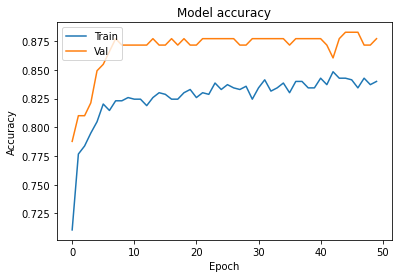

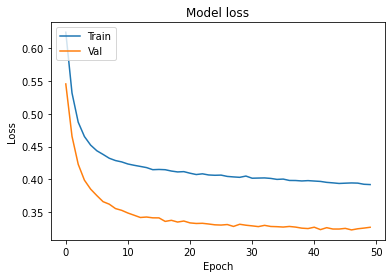

In [35]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [36]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on test set is %f" %(test_acc * 100)  + "%")

14/14 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7775
Accuracy on train set is 85.297418%
Accuracy on test set is 77.751195%


## Write the outputs to the csv file

In [37]:
ids = np.array([i + X_train.shape[0] + 1 for i in range(X_test.shape[0])])
ans = {'PassengerId': ids, 'Survived': Y_pred_lr}

In [38]:
df = pd.DataFrame(ans)

In [39]:
df.to_csv('output.csv', index = False)